In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import h, c, k
from scipy.fftpack import fft, fftfreq

In [2]:
def planck_law(wavelength, T):
    """Planck's law for spectral radiance."""
    return (2 * h * c**2) / (wavelength**5 * (np.exp((h * c) / (wavelength * k * T)) - 1))

def create_blackbody_spectrum(wavelengths, T):
    """Create a black body spectrum."""
    return planck_law(wavelengths, T)

def simulate_interferogram(spectrum, wavelengths, mirror_positions):
    """Simulate the interferogram produced by a Michelson interferometer."""
    interferogram = np.zeros_like(mirror_positions)
    for i, pos in enumerate(mirror_positions):
        phase_diff = 4 * np.pi * pos / wavelengths
        interferogram[i] = np.sum(spectrum * np.cos(phase_diff))
    return interferogram

def apply_fourier_transform(interferogram, mirror_positions):
    """Apply Fourier transform to the interferogram."""
    ft = fft(interferogram)
    freqs = fftfreq(len(mirror_positions), mirror_positions[1] - mirror_positions[0])
    return freqs[:len(freqs)//2], np.abs(ft)[:len(ft)//2]

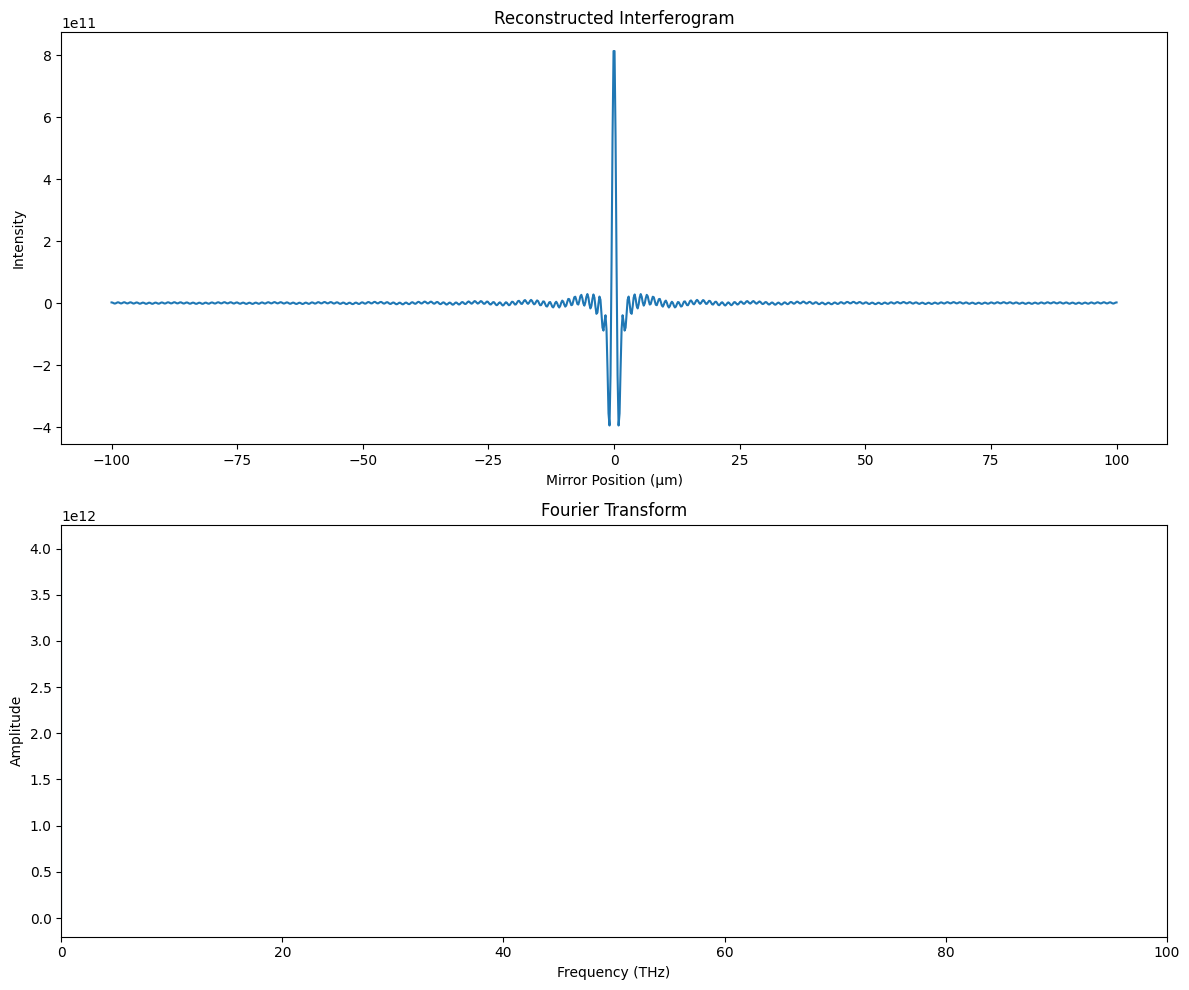

In [3]:
# Parameters
wavelengths = np.linspace(2500e-9, 20000e-9, 1000)  # wavelengths in meters
T = 1000  # temperature in Kelvin
mirror_positions = np.linspace(-100e-6, 100e-6, 1000)  # mirror positions in meters

# Create black body spectrum
spectrum = create_blackbody_spectrum(wavelengths, T)

# Simulate interferogram
interferogram = simulate_interferogram(spectrum, wavelengths, mirror_positions)

# Apply Fourier transform
freqs, ft_spectrum = apply_fourier_transform(interferogram, mirror_positions)

# Plot results
plt.figure(figsize=(12, 10))

plt.subplot(2, 1, 1)
plt.plot(mirror_positions * 1e6, interferogram)
plt.title('Reconstructed Interferogram')
plt.xlabel('Mirror Position (μm)')
plt.ylabel('Intensity')

plt.subplot(2, 1, 2)
plt.plot(freqs / 1e12, ft_spectrum)
plt.title('Fourier Transform')
plt.xlabel('Frequency (THz)')
plt.ylabel('Amplitude')
plt.xlim(0, 100)  # Limit x-axis to show relevant frequencies

plt.tight_layout()
plt.show()

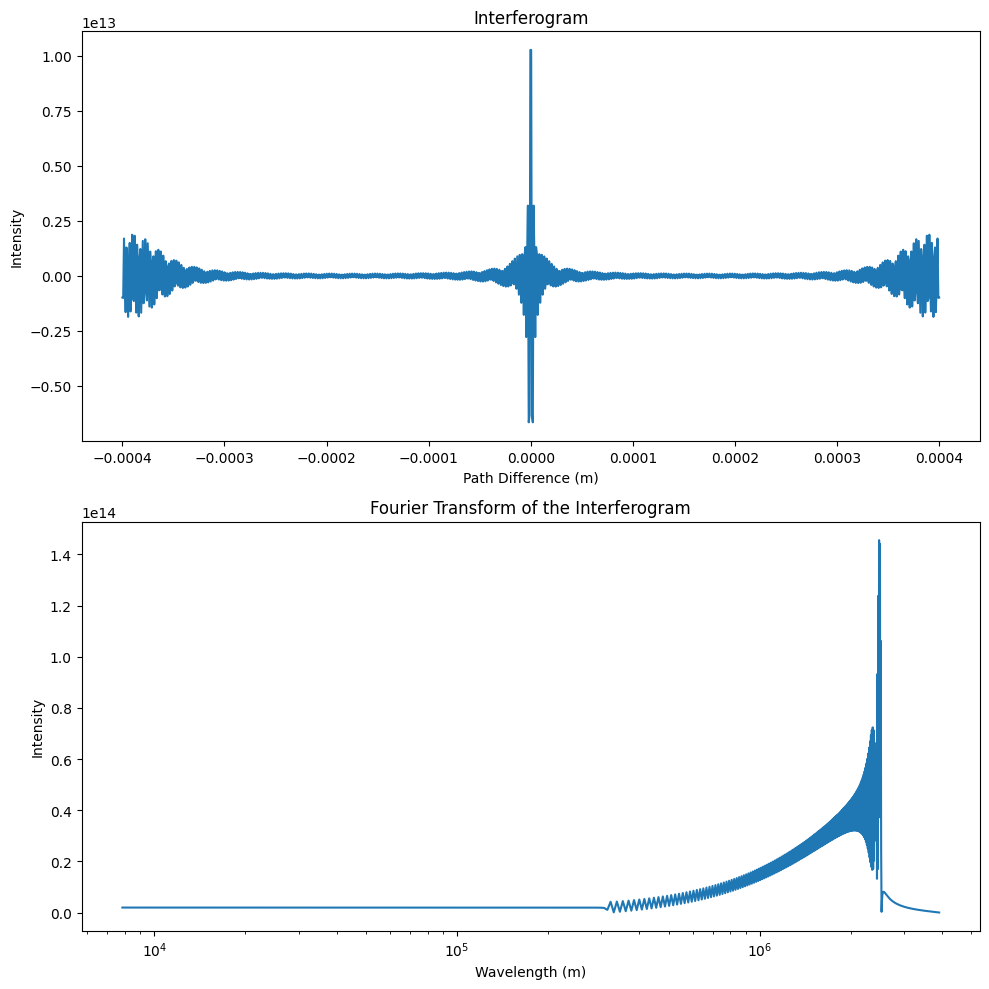

In [6]:
# Constants
temperature = 3000  # K, typical for an IR source
wavelengths_nm = np.linspace(2500, 20000, 1000)  # from 2500 nm to 20000 nm
wavelengths_m = wavelengths_nm * 1e-9  # Convert nm to m

# Black body radiation using Planck's law
def plancks_law(wavelength, T):
    return (2 * h * c**2) / (wavelength**5 * (np.exp(h * c / (wavelength * k * T)) - 1))

intensities = plancks_law(wavelengths_m, temperature)

# Simulate Michelson Interferometer
# Define the mirror movement range which corresponds to the optical path difference
max_path_difference = 0.4e-3  # 1 mm max path difference
path_differences = np.linspace(-max_path_difference, max_path_difference, 1000)  # Symmetric about zero

# Compute the interferogram: For each path difference, calculate the interference pattern
interferogram = np.array([np.sum(intensities * np.cos(2 * np.pi * path_difference / wavelengths_m)) for path_difference in path_differences])

# Fourier Transform of the interferogram
ft_signal = fft(interferogram)
wavenumbers = fftfreq(interferogram.size, d=(path_differences[1] - path_differences[0])) * 2 * np.pi


# Plotting
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Interferogram plot
axs[0].plot(path_differences, interferogram)
axs[0].set_title('Interferogram')
axs[0].set_xlabel('Path Difference (m)')
axs[0].set_ylabel('Intensity')

# Fourier Transform plot
axs[1].plot(wavenumbers[wavenumbers > 0], np.abs(ft_signal[wavenumbers > 0]), label='FT of Interferogram')
axs[1].set_title('Fourier Transform of the Interferogram')
axs[1].set_xlabel('Wavelength (m)')
axs[1].set_ylabel('Intensity')
axs[1].set_xscale('log')

plt.tight_layout()
plt.show()